In [330]:
hs = pd.read_csv('/Users/binxiang/Desktop/Insight/Week 2/SH_CB.csv')
ind_select = hs[hs['CB_Category']=='Finance'].index.tolist() + list(set(hs[hs['LOCATION']==' MA'].index.tolist()).intersection(hs[hs['TITLE']=='Venture Round'].index.tolist()))
ind_select = unique(ind_select)
hs_sub = hs.loc[ind_select,:]
#hs_sub = hs
#len(ind_select)

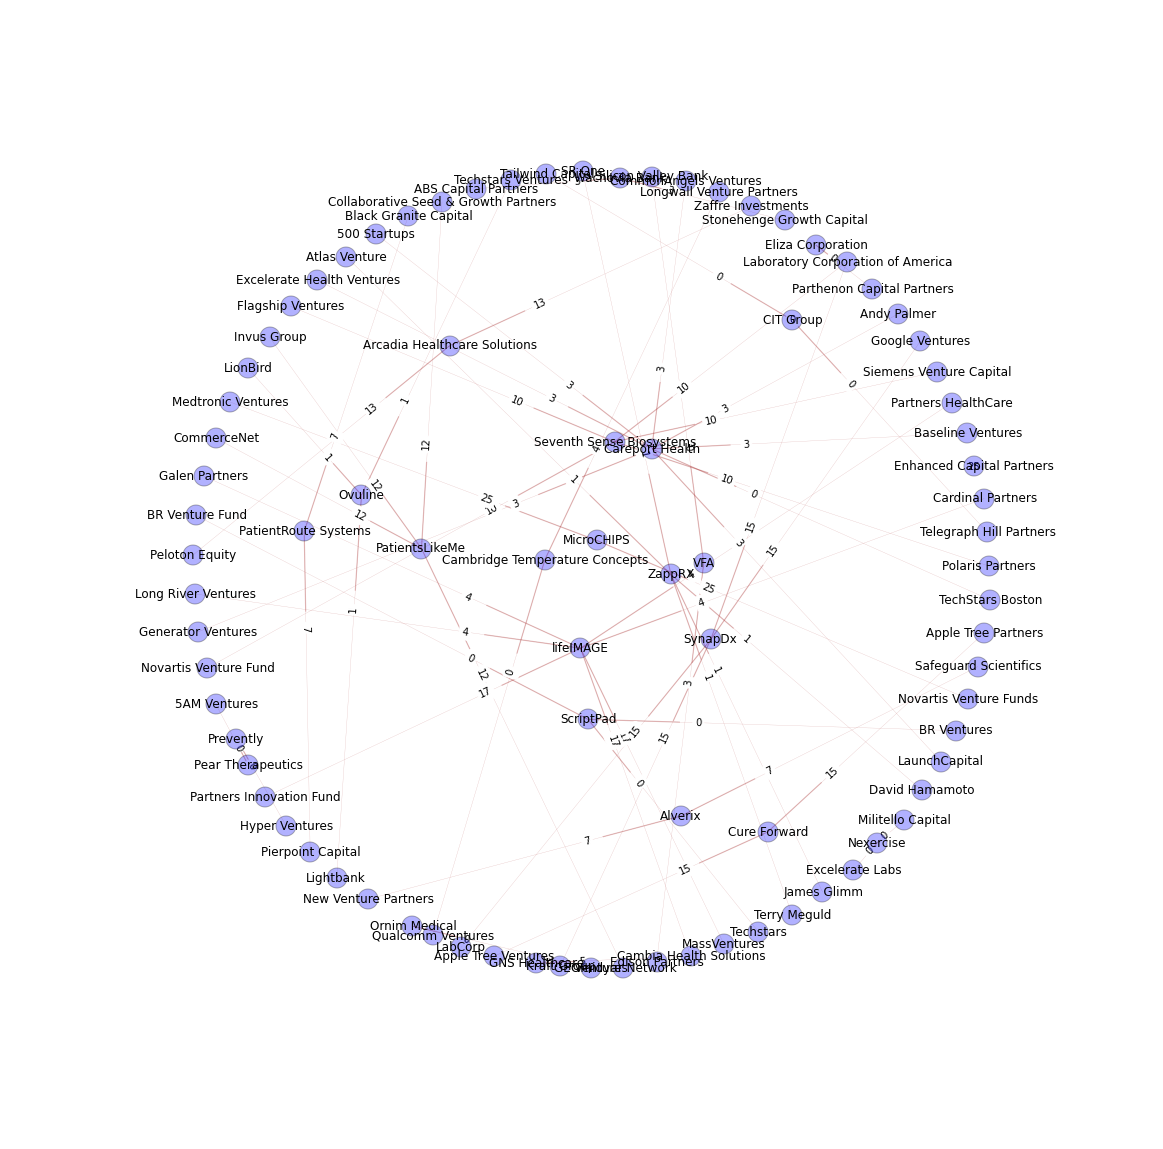

In [332]:
import pandas as pd
import pickle
import networkx as nx
from networkx import graphviz_layout
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import pandas as pd 
from pandas import *
import itertools
import numpy
%matplotlib inline
plt.rc('figure',figsize=(20,20))

#subset = pd.read_csv('/Users/binxiang/Desktop/Insight/Week 2/SubDataSet_For_NetworkX.csv')    
#hs = pd.read_csv('/Users/binxiang/Desktop/Insight/Week 2/SH_CB.csv')
#ind_select = hs[hs['SUB_TAG1']=='Sensors'].index.tolist() + [43,643,644,1787,3623,3695,3696,102,255,256,257,258,259,260]
#ind_select = unique(ind_select)
#hs_sub = hs.loc[ind_select,:]
#hs_sub = hs
#hs_sub = hs[hs['SUB_TAG1']=='Sensors']

# make graph input, list of tuples
graph = []
labels = []
for irow_hs in hs_sub.index:
    inv = unique(hs_sub.loc[irow_hs,'investor_company0':'investor_company11'].dropna().values.tolist() + hs_sub.loc[irow_hs,'investor_user0':'investor_user23'].dropna().values.tolist() + hs_sub.loc[irow_hs,'CB_Investor0':'CB_Investor7'].dropna().values.tolist()).tolist()
    for i_inv in range(len(inv)):
        graph.append((inv[i_inv],hs_sub.loc[irow_hs,'COMPANY_NAME']))
        labels.append(hs_sub.loc[irow_hs,'FUNDING_AMOUNT']/1000000)
draw_graph(graph, labels=labels, graph_layout='spring',node_size=400, node_color='blue', node_alpha=0.3,node_text_size=12,edge_color='brown', edge_alpha=0.3, edge_tickness=0.3,edge_text_pos=0.3,text_font='sans-serif')


In [309]:

def draw_graph(graph, labels=None, graph_layout='shell',node_size=1600, node_color='blue', node_alpha=0.3,node_text_size=12,edge_color='blue', edge_alpha=0.3, edge_tickness=1,edge_text_pos=0.3,text_font='sans-serif'):

    # create networkx graph
    G=nx.DiGraph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    if labels is None:
        labels = range(len(graph))

    edge_labels = dict(zip(graph, labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
                                 label_pos=edge_text_pos)
    pickle.dump(G,open('network.p', 'wb'))
    #pickle.dump( favorite_color, open( "save.p", "wb" ) )
    # show graph
    limits=plt.axis('off')
    plt.show()
    
# you may name your edge labels
#labels = map(chr, range(65, 65+len(graph)))
#draw_graph(graph, labels)

# if edge labels is not specified, numeric labels (0, 1, 2...) will be used
#draw_graph(graph)

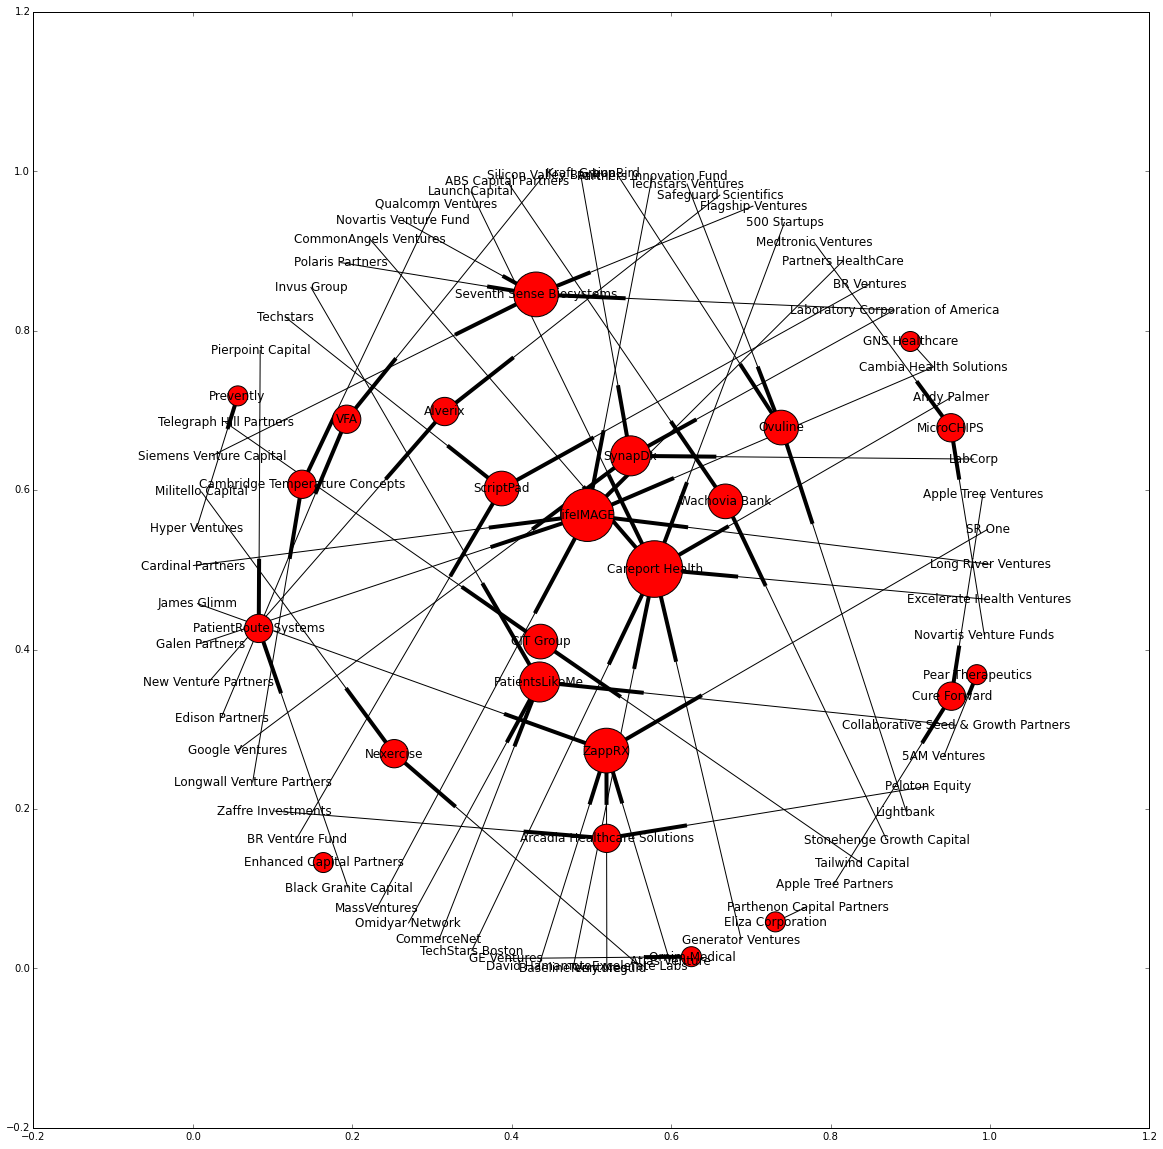

In [333]:
G = pickle.load( open('network.p', "rb" ) ) 
#G.nodes()
#G.in_degree('Allen & Company')
node_size = dict()
for i in G.nodes():
    temp = ({i: G.in_degree(i)})
    node_size.update(temp)
    #print i, G.out_degree(i)
    
#node_size
#list(Series(G.nodes()).map(node_size))
nx.draw_networkx(G, node_size=list((Series(G.nodes()).map(node_size))*400))


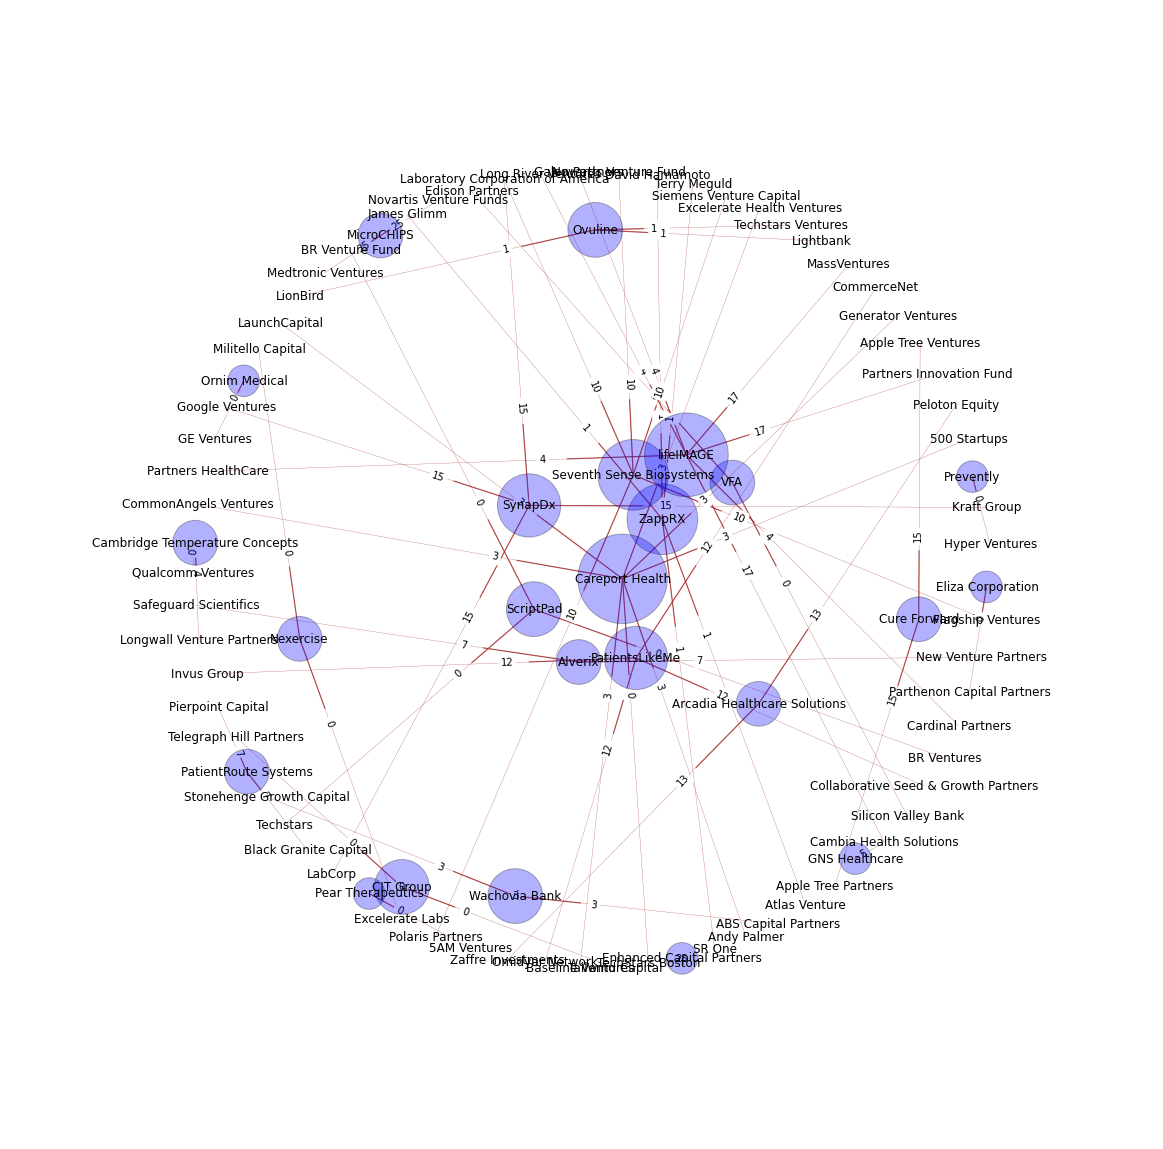

In [342]:
G = pickle.load( open('network.p', "rb" ) ) 
pos = nx.spring_layout(G)

fig = plt.figure()
nx.draw_networkx_nodes(G,pos,node_size=list((Series(G.nodes()).map(node_size))*1000), alpha=0.3, node_color='blue',node_text_size=30)
nx.draw_networkx_edges(G,pos,width=0.3,alpha=0.8,edge_color='brown')
nx.draw_networkx_labels(G, pos,font_size=12,font_family='sans-serif')
edge_labels = dict(zip(graph, labels))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)
limits=plt.axis('off')
plt.show()
fig.savefig('test.png')


In [286]:
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)
            
import numpy as np
from collections import defaultdict

def assignmentArray_to_lists(assignment_array):
    by_attribute_value = defaultdict(list)
    for node_index, attribute_value in enumerate(assignment_array):
        by_attribute_value[attribute_value].append(node_index)
    return by_attribute_value.values()




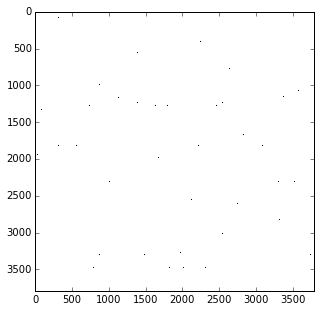

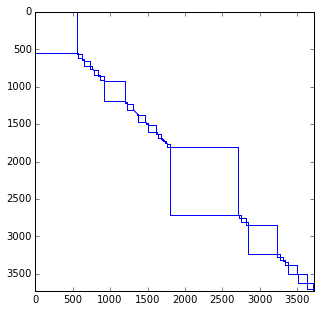

In [295]:
from scipy import io
#A = io.mmread("Caltech.mtx")
#G = nx.from_scipy_sparse_matrix(A)
G = pickle.load( open('network.p', "rb" ) ) 
draw_adjacency_matrix(G)

# Load in array which maps node index to dorm number
# Convert this to a list of lists indicating dorm membership
#dorm_assignment = np.genfromtxt("caltech_dorms_blanksInferred.txt", dtype="u4")
dorm_assignment = np.array(hs['LOCATION'])
#dorm_lists = assignmentArray_to_lists(dorm_assignment)
dorm_lists = assignmentArray_to_lists(dorm_assignment)

# Create a list of all nodes sorted by dorm, and plot
# adjacency matrix with this ordering
nodes_dorm_ordered = [node for dorm in dorm_lists for node in dorm]
draw_adjacency_matrix(G, nodes_dorm_ordered, [dorm_lists],["blue"])



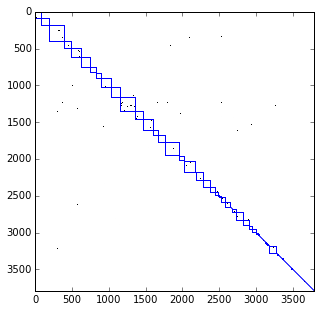

In [300]:
G = pickle.load( open('network.p', "rb" ) ) 
louvain_community_dict = louvain.best_partition(G)
# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.iteritems():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()
nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["blue"])


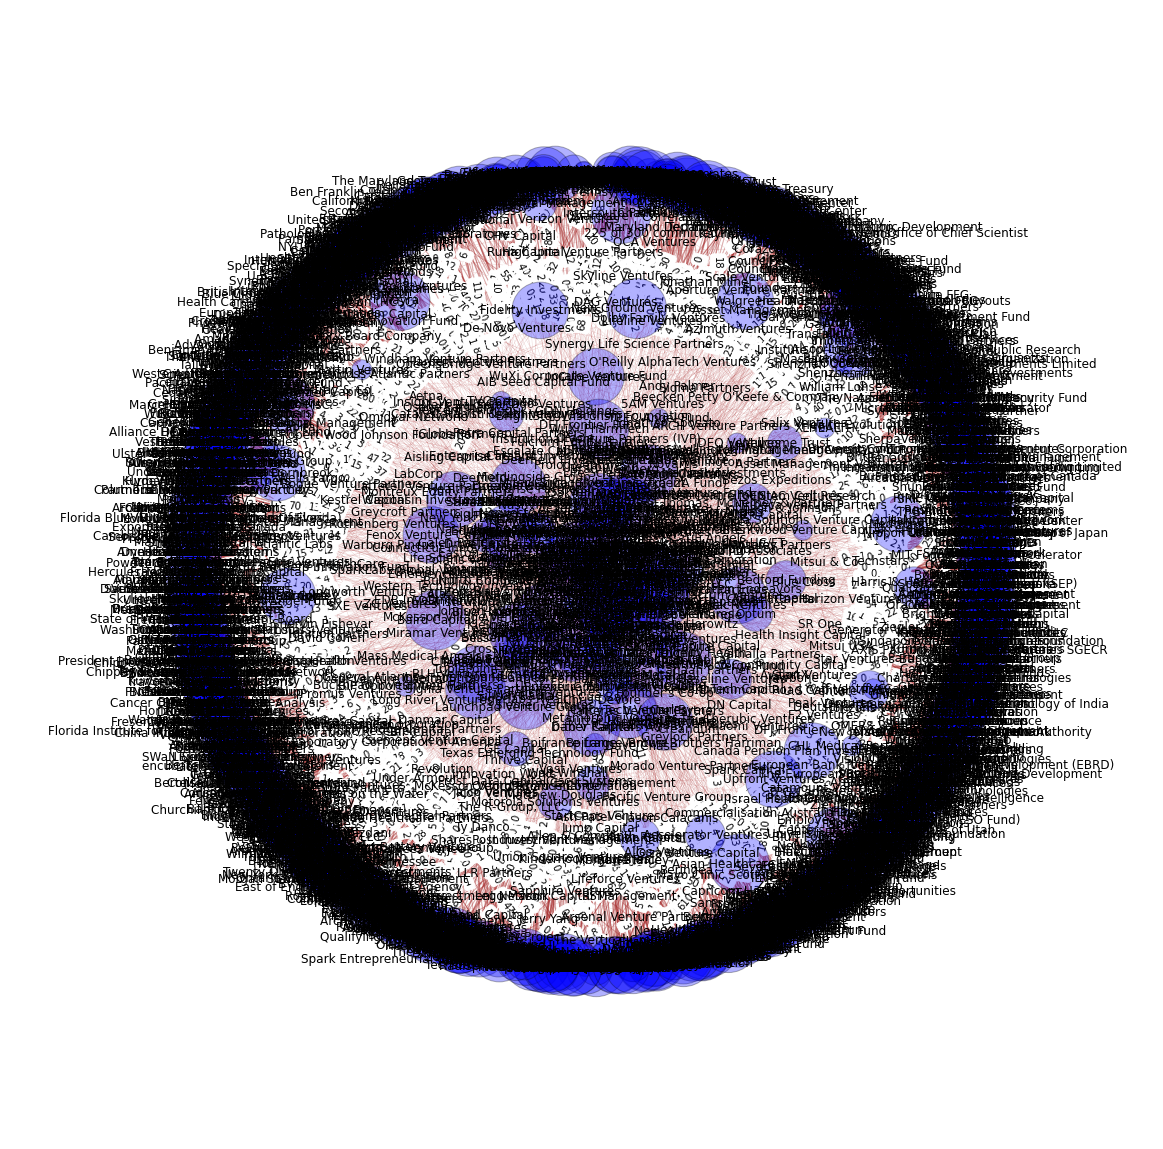

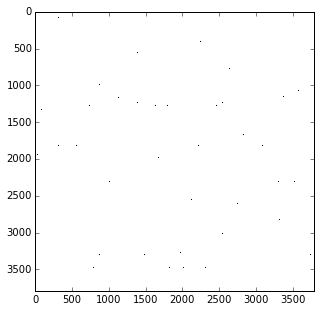

In [284]:
# Adjacency matrix

hs = pd.read_csv('/Users/binxiang/Desktop/Insight/Week 2/SH_CB.csv')

# make graph input, list of tuples
graph = []
labels = []
for irow_hs in hs.index:
    inv = unique(hs.loc[irow_hs,'investor_company0':'investor_company11'].dropna().values.tolist() + hs.loc[irow_hs,'investor_user0':'investor_user23'].dropna().values.tolist() + hs.loc[irow_hs,'CB_Investor0':'CB_Investor7'].dropna().values.tolist()).tolist()
    for i_inv in range(len(inv)):
        graph.append((inv[i_inv],hs.loc[irow_hs,'COMPANY_NAME']))
        labels.append(hs.loc[irow_hs,'FUNDING_AMOUNT']/1000000)
#draw_graph(graph, labels=labels, graph_layout='spring',node_size=list((Series(G.nodes()).map(node_size))*400), node_color='blue', node_alpha=0.3,node_text_size=12,edge_color='brown', edge_alpha=0.3, edge_tickness=0.3,edge_text_pos=0.3,text_font='sans-serif')

from scipy import io
#A = io.mmread("Caltech.mtx")
#G = nx.from_scipy_sparse_matrix(A)
G = pickle.load( open('network.p', "rb" ) ) 
draw_adjacency_matrix(G)

# Load in array which maps node index to dorm number
# Convert this to a list of lists indicating dorm membership
#dorm_assignment = np.genfromtxt("caltech_dorms_blanksInferred.txt", dtype="u4")
dorm_assignment = np.array(hs['LOCATION'])
#dorm_lists = assignmentArray_to_lists(dorm_assignment)
dorm_lists = assignmentArray_to_lists(dorm_assignment)

# Create a list of all nodes sorted by dorm, and plot
# adjacency matrix with this ordering
nodes_dorm_ordered = [node for dorm in dorm_lists for node in dorm]
draw_adjacency_matrix(G, nodes_dorm_ordered, [dorm_lists],["blue"])
#import louvain

# Run louvain community finding algorithm
louvain_community_dict = louvain.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.iteritems():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["blue"])



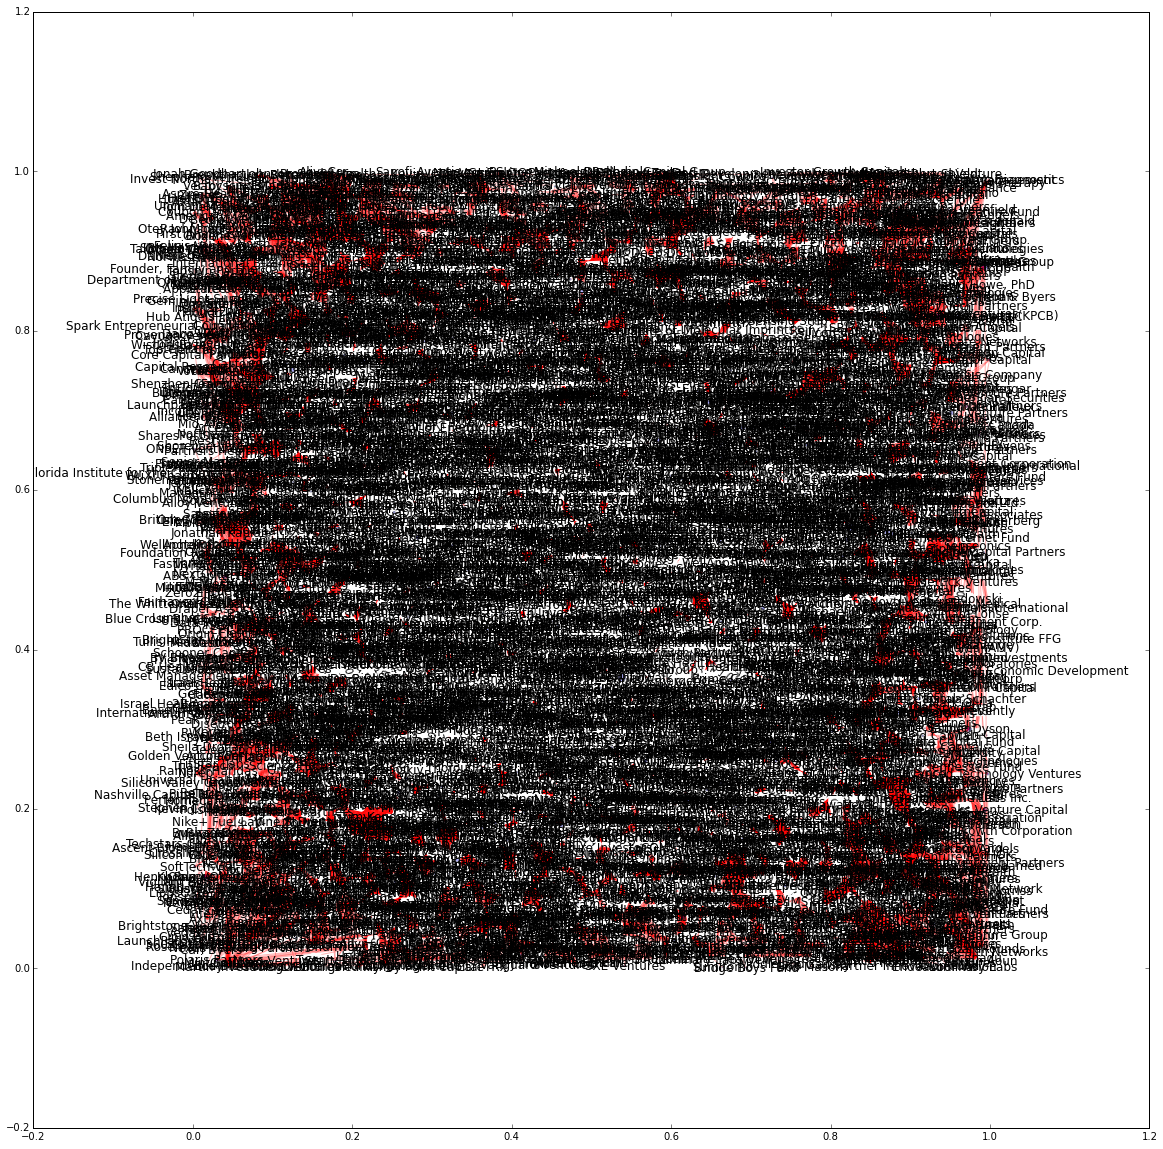

In [91]:
#draw_graph(graph, labels=labels, graph_layout='random',node_size=400, node_color='blue', node_alpha=0.3,node_text_size=12,edge_color='blue', edge_alpha=0.3, edge_tickness=1,edge_text_pos=0.3,text_font='sans-serif')

# create networkx graph
G=nx.DiGraph()

# add edges
for edge in graph:
    G.add_edge(edge[0], edge[1])

# these are different layouts for the network you may try
graph_pos=nx.random_layout(G)
#node_size = list(Series(G.nodes()).map(node_size))*10000

# draw graph
nx.draw_networkx_nodes(G,graph_pos,node_size=list(Series(G.nodes()).map(node_size))*10000, alpha=0.3, node_color='blue')
nx.draw_networkx_edges(G,graph_pos,width=1,alpha=0.3,edge_color='red')
nx.draw_networkx_labels(G, graph_pos,font_size=12,font_family='sans-serif')

edge_labels = dict(zip(graph, labels))
nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, label_pos=0.3)

# show graph
plt.show()


In [127]:
hs = pd.read_csv('/Users/binxiang/Desktop/Insight/Week 2/SH_CB.csv')
hs_sub = hs.loc[3650:3700]
#hs_sub
hs_sub[hs_sub['COMPANY_NAME']=='FitBit']

COMPANY_NAME  COMPANY_ID        DATE     TITLE  FUNDING_AMOUNT LOCATION  \
3623       FitBit         962      5/7/15       IPO       100000000       CA   
3695       FitBit         962  0000-00-00  Acquired               0       CA   
3696       FitBit         962  0000-00-00  Acquired               0       CA   

     SUB_TAG1   SUB_TAG2 SUB_TAG3 SUB_TAG4        ...        CB_Investor23  \
3623  Sensors  Wearables      NaN      NaN        ...                  NaN   
3695  Sensors  Wearables      NaN      NaN        ...                  NaN   
3696  Sensors  Wearables      NaN      NaN        ...                  NaN   

     CB_Investor23UUID CB_Investor24 CB_Investor24UUID CB_Investor25  \
3623               NaN           NaN               NaN           NaN   
3695               NaN           NaN               NaN           NaN   
3696               NaN           NaN               NaN           NaN   

     CB_Investor25UUID CB_Investor26 CB_Investor26UUID CB_Investor27  \
3623               NaN           NaN               NaN           NaN   
3695               NaN           NaN               NaN           NaN   
3696               NaN           NaN               NaN           NaN   

     CB_Investor27UUID  
3623               NaN  
3695               NaN  
3696               NaN  

[3 rows x 128 columns]

In [186]:
ind_select = hs[hs['SUB_TAG1']=='Sensors'].index.tolist() + [43,643,644,1787,3623,3695,3696,102,255,256,257,258,259,260,82,354,355,681,3363,3364]
ind_select = unique(ind_select)

In [231]:
hs = pd.read_csv('/Users/binxiang/Desktop/Insight/Week 2/SH_CB.csv')
ind_select = hs[hs['CB_Category']=='Wearables'].index.tolist() + [43,643,644,1787,3623,3695,3696,102,255,256,257,258,259,260]
ind_select = unique(ind_select)
hs_sub = hs.loc[ind_select,:]

hs_sub

COMPANY_NAME  COMPANY_ID        DATE          TITLE  \
43                   FitBit         962      5/1/12       Series C   
60                     Jiff        1003      3/1/12       Series A   
70                     MC10        1028      1/1/12       Series C   
74         Misfit Wearables        1040      5/1/12       Series A   
102                 Jawbone        1115     12/1/11       Series E   
146               BodyMedia        1511      5/1/12       Series B   
255                 Jawbone        1115     12/1/06           Seed   
256                 Jawbone        1115      1/1/08       Series B   
257                 Jawbone        1115      7/1/07       Series A   
258                 Jawbone        1115      1/1/08       Series C   
259                 Jawbone        1115      3/1/11       Series D   
260                 Jawbone        1115      7/1/11       Series E   
362                    MC10        1028      1/1/09       Series A   
363                    MC10        1028      1/1/09          Grant   
364                    MC10        1028      6/1/11       Series B   
365                    MC10        1028      8/1/11       Series B   
388                   Yosko        3390      8/1/12      Incubator   
581                  QMedic        7910     11/1/10           Seed   
643                  FitBit         962     10/1/08       Series A   
644                  FitBit         962      9/1/10       Series B   
648               BodyMedia        1511     10/1/10       Series A   
712                    MC10        1028      4/1/13       Series D   
800        Misfit Wearables        1040      1/1/13   Crowdfunding   
1189                 Amiigo       10968      3/1/13   Crowdfunding   
1336                Movable       15034      6/1/13           Seed   
1576       Misfit Wearables        1040     11/1/11           Seed   
1787                 FitBit         962      8/1/13       Series D   
2001              BodyMedia        1511      8/1/03       Series C   
2002              BodyMedia        1511      1/1/06       Series E   
2003              BodyMedia        1511      5/1/07       Series E   
2004              BodyMedia        1511      4/1/09  Venture Round   
2005              BodyMedia        1511      5/1/13       Acquired   
2006              BodyMedia        1511      3/1/12  Venture Round   
2560                 Amiigo       10968     10/1/13           Debt   
2697       Misfit Wearables        1040     12/1/13       Series B   
2730                   MC10        1028     12/1/13  Venture Round   
2846               Quanttus       20823      2/1/14       Series A   
2847               Quanttus       20823      1/1/12           Seed   
2971      Halo Neuroscience       22072      5/1/14           Seed   
3027              Valencell       22738      6/1/14       Series C   
3028              Valencell       22738      6/1/11       Series B   
3029              Valencell       22738     11/1/09       Series A   
3145                  Athos       24720      8/1/14       Series B   
3146                  Athos       24720     11/1/13       Series A   
3156  Wearable Intelligence       24841      8/1/14       Series A   
3228                   Jiff        1003     9/23/14       Series B   
3272                 Strava       25855    10/29/14  Venture Round   
3273                 Strava       25855     7/27/11       Series B   
3274                 Strava       25855     1/12/11       Series A   
3328       Misfit Wearables        1040     12/3/14       Series C   
3333                  Strap       26247     12/2/14           Seed   
3423      Monica Healthcare       26890      2/3/15           Seed   
3523                  Feetz       27337     3/16/15           Seed   
3623                 FitBit         962      5/7/15            IPO   
3644                   Jiff        1003     5/21/15       Series C   
3695                 FitBit         962  0000-00-00       Acquired   
3696                 FitB

In [219]:
irow_hs=102
inv = unique(hs_sub.loc[irow_hs,'investor_company0':'investor_company11'].dropna().values.tolist() + hs_sub.loc[irow_hs,'investor_user0':'investor_user23'].dropna().values.tolist() + hs_sub.loc[irow_hs,'CB_Investor0':'CB_Investor7'].dropna().values.tolist()).tolist()
inv

['Kleiner Perkins Caufield & Byers', 'Deutsche Telekom']

In [217]:
ind_select = unique(ind_select)